Importa as classes necessárias e monta o drive para acessar os datasets.

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

drive.mount('/content/gdrive')


Mounted at /content/gdrive


Lê o arquivo com os dados de treinamento e apresenta os valores dos 10 primeiros registros.

In [ ]:
dados_train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Mineração de Dados/Aula6/train.csv')
dados_train.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


Verifica se existe algum valor nulo no conjunto.

In [ ]:
dados_train.isna().sum()

x    0
y    1
dtype: int64

Como existe um valor nulo na coluna y, elimina o(s) registro(s) com valor(es) nulo(s). Em seguida apresenta as estatísticas básicas dos dados lidos.

In [ ]:
dados_train.dropna(inplace=True)
dados_train.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


1.   Armazena os dados da coluna X na variável X_train, que é uma lista de listas, por isto precisa usar a função reshape. Cada lista possui apenas um valor.
2.   Armazena os dados da coluna Y na variável y_train, que é uma lista de valores numéricos.
3.   Apresenta o diagrama de dispersão dos dados de treinamento.



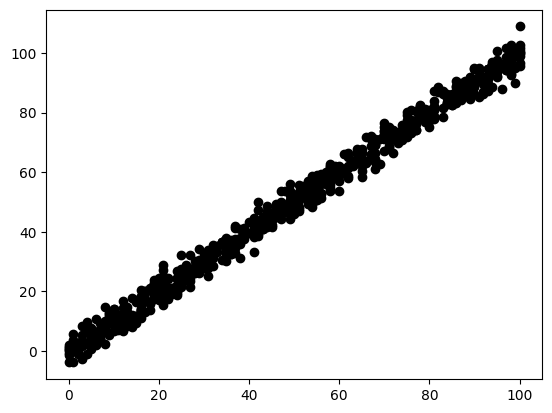

In [ ]:
X_train = np.array(dados_train['x']).reshape(-1, 1).tolist()
y_train = dados_train['y']
plt.scatter(X_train, y_train, color="black")
plt.show()

Lê o arquivo de teste e verifica se existe algum valor nulo.

In [ ]:
dados_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/InteligenciaArtificial/Datasets/test.csv')
dados_test.isna().sum()

x    0
y    0
dtype: int64

Como não há valores nulos não precisa eliminar nada, apenas mostrar as estatísticas.

In [ ]:
dados_test.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


1.   Armazena os dados da coluna X na variável X_test, que é uma lista de listas, por isto precisa usar a função reshape. Cada lista possui apenas um valor.
2.   Armazena os dados da coluna Y na variável y_test, que é uma lista de valores numéricos.
3.   Apresenta o diagrama de dispersão dos dados de treinamento.

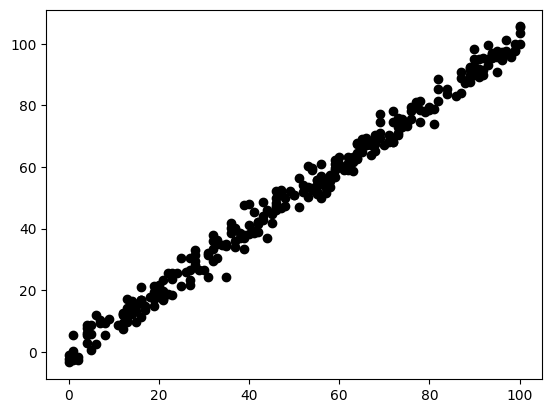

In [ ]:
X_test = np.array(dados_test['x']).reshape(-1, 1).tolist()
y_test = dados_test['y']

plt.scatter(X_test, y_test, color="black")
plt.show()

1. Cria o modelo;
2. Treina o modelo, a partir dos dados de treinamento;
3. Calcula os valores o conjunto de teste;
4. Apresenta os coeficientes da reta;
5. Calcula e apresenta o coeficiente de determinação (r2).
6. Calcula e apresenta o erro médio quadrado (mse).

In [ ]:
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
w1 = modelo.coef_
w0 =  modelo.intercept_
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Reta {w1[0]:.3f}x +  {w0:.3f}')
print("Coeficiente de determinação: ", r2)
print("Erro quadrado médio: ",mse)

Reta 1.001x +  -0.107
Coeficiente de determinação:  0.9888014444327563
Erro quadrado médio:  9.432922192039305


Apresenta o diagrama de dispersão dos dados de teste em preto e os valores preditos em vermelho.

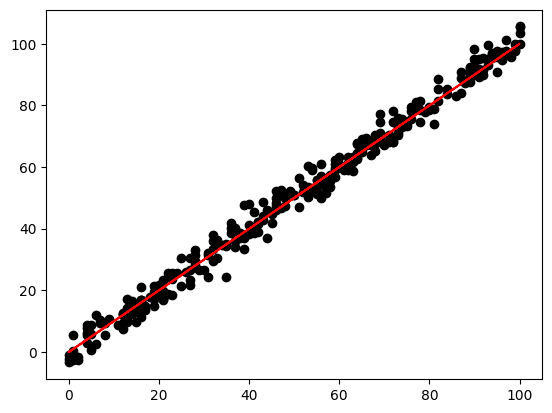

In [ ]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test,y_pred,color='red')
plt.show()

Calcula os valores resultantes, com base no modelo gerado.

In [ ]:
y = modelo.predict([[10],[20],[30]])
print(y)

[ 9.89929835 19.90586217 29.91242599]
